# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| id_cliente              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| sexo                    |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_veiculo        |  ESCREVER AQUI                                      | ESCREVER AQUI|
| posse_de_imovel         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qtd_filhos              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_renda              |  ESCREVER AQUI                                      | ESCREVER AQUI|
| educacao                |  ESCREVER AQUI                                      | ESCREVER AQUI|
| estado_civil            |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tipo_residencia         |  ESCREVER AQUI                                      | ESCREVER AQUI|
| idade                   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| tempo_emprego           |  ESCREVER AQUI                                      | ESCREVER AQUI|
| qt_pessoas_residencia   |  ESCREVER AQUI                                      | ESCREVER AQUI|
| renda                   |  ESCREVER AQUI                                      | ESCREVER AQUI|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [2]:
renda = pd.read_csv('../data/raw/previsao_de_renda.csv').drop('Unnamed: 0', axis=1)
renda.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa iremos avaliar a distribuição de todas as variáveis. 

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('../reports/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<span style="color:red">ESCREVER AQUI</span>


### Entendimento dos dados - Bivariadas




<span style="color:red">ESCREVER AQUI</span>


A partir da análise do relatório criado, foram constadas que:

- Podem existir ID duplicados no nosso conjunto de dados

- Algumas variáveis categóricas podem estar enviesadas (predominância maior de uma classe em detrimento das outras)

- Algumas linhas estão com dados faltando

## Pré-analise

Vamos começar pelos IDs duplicados.

In [3]:
id_duplicados = [item for item in renda['id_cliente'].value_counts().index if renda['id_cliente'].value_counts()[item] != 1]

In [4]:
renda.loc[renda['id_cliente'].isin(id_duplicados)].sort_values(by='id_cliente').head(10)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
9064,2015-10-01,1,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,1938.57
7077,2015-08-01,1,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,1938.57
9212,2015-10-01,2,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,5702.28
7377,2015-08-01,2,F,False,True,0,Empresário,Secundário,Solteiro,Casa,52,8.358904,1.0,5702.28
13907,2016-02-01,8,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,373.93
4056,2015-05-01,8,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,373.93
6455,2015-07-01,8,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,373.93
13451,2016-02-01,9,F,False,True,1,Assalariado,Superior completo,Solteiro,Casa,30,4.438356,2.0,1929.10
2846,2015-03-01,9,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,1929.10
836,2015-01-01,9,F,False,True,1,Assalariado,Secundário,Solteiro,Casa,30,4.438356,2.0,1929.10


Como podemos observar acima, a única coluna cujo valor muda por cada **id** é a coluna **data_ref**, mostrando que a mesma pessoa foi reintroduzida na base de dados em dias diferentes, como esses dados podem afetar o modelo, vamos elimina-los na próxima etapa.

Mas primeiro, com o intuito de analisar a **entropia** das variáveis categóricas, vamos transformar o tipo da variável **data_ref**.

In [5]:
renda['data_ref'] = pd.to_datetime(renda['data_ref'])
renda['data_ref']

0       2015-01-01
1       2015-01-01
2       2015-01-01
3       2015-01-01
4       2015-01-01
           ...    
14995   2016-03-01
14996   2016-03-01
14997   2016-03-01
14998   2016-03-01
14999   2016-03-01
Name: data_ref, Length: 15000, dtype: datetime64[ns]

No nosso caso em específicio, é prefencial que nossas variáveis tenha uma alta **entropia**, pois isso significa mais diversidade nas proporções das classes e um maior grau de aleatoriedade na variável, permitindo uma indução menos enviesada pelo conjunto usado para treinar o modelo.

A fórmula matemática usada para escrever as funções de entropia é a fórmula proposta pela **Teoria da Informação**, de *Claude E. Shannon*.

$$ H(x) = - \sum^n_{i=1} P(x_i)log_2P(x_i)$$

Onde:

- $n$ é o número de classes dentro da variável $x$
- $i$ são as classes
- $x$ é a variável categórica
- $P(x_i)$ é a probabilidade de uma classe aleatória ser selecionada, aleatoriamente, do conjunto de classes da variável, em outros termos, é a **frequência** daquela classe no conjunto da variável $x$
- $log_2P(x_i)$ é o módulo da medida de **informação** da classe

Com o intuito de avaliar a **entropia** de cada variável categórica, nós vamos considerar o cálculo do valor *máximo* de entropia de uma variável categórica, dado pela fórmula:

$$H(x) = log_2P(x_i)$$

Segue abaixo as funções que usaremos para calcular a entropia das variáveis categóricas. 


In [6]:
def calcular_entropia_shannon(tab_freq):
    h = 0
    for classe in tab_freq.index:
        h += tab_freq[classe] * np.log2(tab_freq[classe])
    return h * -1

In [7]:
def calcular_entropia_maxima(tab_freq):
    return np.log2(len(tab_freq))

In [8]:
taxas_entropia_antes = dict()

for col in renda.select_dtypes(include=['object', 'bool']).columns:
    tab = renda[col].value_counts() / len(renda[col])
    h = calcular_entropia_shannon(tab)
    h_max = calcular_entropia_maxima(tab)
    tx_h = (h / h_max) * 100
    taxas_entropia_antes[col] = tx_h
    print('A entropia da variável {} é de {:.2f} e seu máximo de entropia é {:.2f}'.format(col, h, h_max))
    print('Taxa de Entropia {:.2f}%'.format(tx_h))
    print()

A entropia da variável sexo é de 0.91 e seu máximo de entropia é 1.00
Taxa de Entropia 91.02%

A entropia da variável posse_de_veiculo é de 0.97 e seu máximo de entropia é 1.00
Taxa de Entropia 96.52%

A entropia da variável posse_de_imovel é de 0.91 e seu máximo de entropia é 1.00
Taxa de Entropia 90.85%

A entropia da variável tipo_renda é de 1.73 e seu máximo de entropia é 2.32
Taxa de Entropia 74.54%

A entropia da variável educacao é de 1.25 e seu máximo de entropia é 2.32
Taxa de Entropia 53.67%

A entropia da variável estado_civil é de 1.45 e seu máximo de entropia é 2.32
Taxa de Entropia 62.29%

A entropia da variável tipo_residencia é de 0.64 e seu máximo de entropia é 2.58
Taxa de Entropia 24.91%



A partir desses cálculos, podemos avaliar que as variáveis **sexo**, **posse_de_veiculo**, **posse_de_imovel** e **tipo_renda** possuem uma boa entropia, ou seja, existe diversidade o suficiente nas incidências de classes para a variável não seja considerada *desproporcional*. 

Contudo, as variáveis **educacao**, **estado_civil** e, principalmente, **tipo_residencia** tem um viés muito forte para uma classe em detetrimento das outras, não iremos eliminar esses valores ainda, pois iremos repetir essas etapas após lidarmos com os dados faltante, duplicados e adicionaremos uma nova variável categórica.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


In [9]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               15000 non-null  datetime64[ns]
 1   id_cliente             15000 non-null  int64         
 2   sexo                   15000 non-null  object        
 3   posse_de_veiculo       15000 non-null  bool          
 4   posse_de_imovel        15000 non-null  bool          
 5   qtd_filhos             15000 non-null  int64         
 6   tipo_renda             15000 non-null  object        
 7   educacao               15000 non-null  object        
 8   estado_civil           15000 non-null  object        
 9   tipo_residencia        15000 non-null  object        
 10  idade                  15000 non-null  int64         
 11  tempo_emprego          12427 non-null  float64       
 12  qt_pessoas_residencia  15000 non-null  float64       
 13  r

Adiantando algo que encontraríamos mais a frente no nosso conjunto de dados, existe uma fortíssima correlação entre as variáveis discretas **qtd_filhos** e **qt_pessoas_residencia**.

In [10]:
renda.corr(numeric_only=True)['qtd_filhos']['qt_pessoas_residencia']

0.889776807402833

Vamos criar, a partir dessas variáveis, uma nova variável categórica; **tam_familia**

Tamanho Família

- Mínima: 1 pessoa
- Pequena: 2 a 3 pessoas
- Média: 3 a 5 pessoas
- Grande: acima de 5 pessoas

In [11]:
renda['tam_familia'] = ''
renda.loc[(renda['qtd_filhos'] == 0) & (renda['qt_pessoas_residencia'] == 1.0), 'tam_familia'] = 'Mínima'
renda.loc[(renda['qtd_filhos'] != 0) & (renda['qt_pessoas_residencia'] == 1.0), 'tam_familia'] = 'Pequena'
renda.loc[(renda['qtd_filhos'] >= 0) & (renda['qt_pessoas_residencia'] > 1.0) & (renda['qt_pessoas_residencia'] <= 3.0), 'tam_familia'] = 'Pequena'
renda.loc[(renda['qtd_filhos'] >= 0) & (renda['qt_pessoas_residencia'] > 3.0) & (renda['qt_pessoas_residencia'] <= 5.0), 'tam_familia'] = 'Média'
renda.loc[(renda['qtd_filhos'] >= 0) & (renda['qt_pessoas_residencia'] > 5.0), 'tam_familia'] = 'Grande'
renda[['qtd_filhos', 'qt_pessoas_residencia', 'tam_familia']]

,qtd_filhos,qt_pessoas_residencia,tam_familia
0,0,1.0,Mínima
1,0,2.0,Pequena
2,0,2.0,Pequena
3,1,3.0,Pequena
4,0,1.0,Mínima
...,...,...,...
14995,0,1.0,Mínima
14996,0,1.0,Mínima
14997,0,2.0,Pequena
14998,0,2.0,Pequena


Agora que incluímos essa nova variável, vamos calcular sua taxa de entropia e adiciona-la ao nosso dicionário para análise posterior.

In [12]:
tab = renda['tam_familia'].value_counts() / len(renda['tam_familia'])
taxas_entropia_antes['tam_familia'] = (calcular_entropia_shannon(tab) / calcular_entropia_maxima(tab)) * 100
print('A entropia da nova variável tam_familia é de {:.2f} e seu máximo de entropia é {:.2f}'.format(calcular_entropia_shannon(tab), 
                                                                                                     calcular_entropia_maxima(tab)))
print('Taxa de Entropia {:.2f}%'.format(taxas_entropia_antes['tam_familia']))

A entropia da nova variável tam_familia é de 1.14 e seu máximo de entropia é 2.00
Taxa de Entropia 57.03%


## Transformação

Agora começaremos a transformar nossos dados, vamos começar criando uma cópia para evitar alterar dados originais e então, eliminaremos as linhas com valores vazios e id duplicados.

In [105]:
df = renda.dropna(axis=0).drop_duplicates(subset='id_cliente', )
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8161 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ref               8161 non-null   datetime64[ns]
 1   id_cliente             8161 non-null   int64         
 2   sexo                   8161 non-null   object        
 3   posse_de_veiculo       8161 non-null   bool          
 4   posse_de_imovel        8161 non-null   bool          
 5   qtd_filhos             8161 non-null   int64         
 6   tipo_renda             8161 non-null   object        
 7   educacao               8161 non-null   object        
 8   estado_civil           8161 non-null   object        
 9   tipo_residencia        8161 non-null   object        
 10  idade                  8161 non-null   int64         
 11  tempo_emprego          8161 non-null   float64       
 12  qt_pessoas_residencia  8161 non-null   float64       
 13  renda  

In [30]:
prof = ProfileReport(df, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
prof.to_file('../reports/renda_analisys_clean.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Como podemos ver acima, a remoção de valores de linhas com valores nulos e linhas com ids duplicados reduziram consideravelmente o tamanho do nosso conjunto de dados. Agora vamos repetir as etapas de cálculo de entropia nas variáveis categóricas para avaliar seu viés.

In [14]:
for col in df.select_dtypes(include=['object', 'bool']).columns:
    tab = df[col].value_counts() / len(df[col])
    h = calcular_entropia_shannon(tab)
    h_max = calcular_entropia_maxima(tab)
    tx_h = (h / h_max) * 100
    print('A entropia da variável {} é de {:.2f} e seu máximo de entropia é {:.2f}'.format(col, h, h_max))
    print('Taxa de Entropia Atual {:.2f}%'.format(tx_h))
    print('Taxa de Entropia Anterior {:.2f}%'.format(taxas_entropia_antes[col]))
    print('Diferença: {:.2f}%'.format(tx_h - taxas_entropia_antes[col]))
    print()

A entropia da variável sexo é de 0.95 e seu máximo de entropia é 1.00
Taxa de Entropia Atual 94.67%
Taxa de Entropia Anterior 91.02%
Diferença: 3.65%

A entropia da variável posse_de_veiculo é de 0.98 e seu máximo de entropia é 1.00
Taxa de Entropia Atual 98.40%
Taxa de Entropia Anterior 96.52%
Diferença: 1.87%

A entropia da variável posse_de_imovel é de 0.93 e seu máximo de entropia é 1.00
Taxa de Entropia Atual 93.09%
Taxa de Entropia Anterior 90.85%
Diferença: 2.25%

A entropia da variável tipo_renda é de 1.29 e seu máximo de entropia é 2.32
Taxa de Entropia Atual 55.69%
Taxa de Entropia Anterior 74.54%
Diferença: -18.86%

A entropia da variável educacao é de 1.26 e seu máximo de entropia é 2.32
Taxa de Entropia Atual 54.05%
Taxa de Entropia Anterior 53.67%
Diferença: 0.38%

A entropia da variável estado_civil é de 1.40 e seu máximo de entropia é 2.32
Taxa de Entropia Atual 60.20%
Taxa de Entropia Anterior 62.29%
Diferença: -2.09%

A entropia da variável tipo_residencia é de 0.70 e

Como podemos ver pelos cálculos, a alteração do conjunto de dados foi em sua maioria benéfica, pois aumentou a entropia da mairoia das variáveis. A única variável que diminiu sua entropia de forma considerável é a variável **tipo_renda** com uma redução de *18.86%* na sua taxa de entropia.

Com isso podemos entender que as variáveis **sexo**, **posse_de_veiculo** e **posse_de_imovel** são as variáveis com menos viés do conjunto de dados, as outras variáveis categóricas **estado_civil**, **tam_familia**, **tipo_renda** e **educacao** tem um viéis mais alto, contudo ainda serão consideradas durante a próxima etapa de selecção de variáveis do modelo.

A única variável que está propensa a ser eliminada nessa etapa é a variável **tipo_residencia** com uma taxa de entropia de *27.16%*.

Como próximo passo, vamos averiguar a correlação das variáveis em três perspectivas:
- A correlação das **classes** das variáveis categóricas entre si
- A correlação das **classes** das variáveis categóricas com as **variáveis númericas**
- A correlação das **classes** das variáveis categóricas com a **variável-alvo (renda)**

Mas antes, vamos transformar algumas variáveis para tornar sua manipulação mais fácil.

In [15]:
df['sexo'] = df['sexo'].map({'F': 1, 'M': 0})
df['posse_de_veiculo'] = df['posse_de_veiculo'].astype(np.int64)
df['posse_de_imovel'] = df['posse_de_imovel'].astype(np.int64)
df['qt_pessoas_residencia'] = df['qt_pessoas_residencia'].astype(np.int64)

In [16]:
df.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,tam_familia
0,2015-01-01,15056,1,0,1,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1,8060.34,Mínima
1,2015-01-01,9968,0,1,1,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2,1852.15,Pequena
2,2015-01-01,4312,1,1,1,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2,2253.89,Pequena
3,2015-01-01,10639,1,0,1,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3,6600.77,Pequena
4,2015-01-01,7064,0,1,0,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1,6475.97,Mínima


Abaixo faremos o primeiro gráfico de correlações através de um **heatmap**, comparando apenas as *flags* das variáveis categóricas como forma de avaliar cada **classe** individualmente.

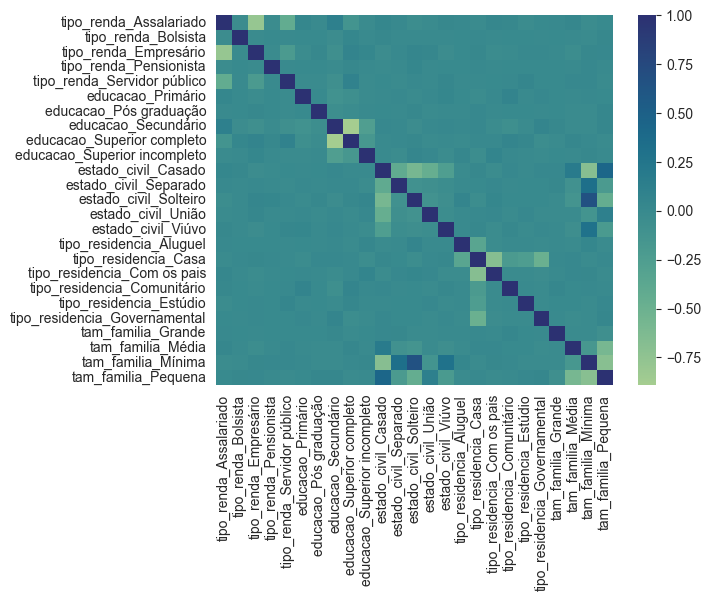

In [17]:
%matplotlib inline
sns.set_style('whitegrid')
sns.heatmap(data=pd.get_dummies(data=df).drop(labels=[col for col in df.columns], errors='ignore', axis=1).corr(), cmap='crest')
plt.show()

Observando a imagem, é notório a baixa correlação generalizada entra as **classes** das variáveis categóricas, com alguns casos isolados de relevantes correlações negativas. Vamos fazer uma busca pelos valores maiores que 0.5 na tabela de correlação.

In [91]:
corr = pd.get_dummies(data=df).drop(labels=[col for col in df.columns], errors='ignore', axis=1).corr()
values0 = dict()
values = dict()

for col in corr:
    values0[col] = ([(corr[col].index[corr[col] == item].tolist()[0], item) for item in corr[col] if (item > 0.5) or (item < -0.5)])

for key in values0.keys():
    if len(values0[key]) != 1:
        values[key] = [item for item in values0[key] if item[1] != 1.0]

for key in values.keys():
    print('A classe {} tem correlações com:'.format(key))
    for c, v in values[key]:
        print('\tClasse {} igual a {}'.format(c, v))
    print()

A classe tipo_renda_Assalariado tem correlações com:
	Classe tipo_renda_Empresário igual a -0.7890517821093915

A classe tipo_renda_Empresário tem correlações com:
	Classe tipo_renda_Assalariado igual a -0.7890517821093915

A classe educacao_Secundário tem correlações com:
	Classe educacao_Superior completo igual a -0.8907211236221279

A classe educacao_Superior completo tem correlações com:
	Classe educacao_Secundário igual a -0.8907211236221279

A classe estado_civil_Casado tem correlações com:
	Classe estado_civil_Solteiro igual a -0.5877940239922973
	Classe tam_familia_Mínima igual a -0.6853995703717366

A classe estado_civil_Solteiro tem correlações com:
	Classe estado_civil_Casado igual a -0.5877940239922973
	Classe tam_familia_Mínima igual a 0.6624032851648796

A classe tipo_residencia_Casa tem correlações com:
	Classe tipo_residencia_Com os pais igual a -0.6830591237947468

A classe tipo_residencia_Com os pais tem correlações com:
	Classe tipo_residencia_Casa igual a -0.6830591

Avaliando a lista acima, vamos excluir as classes que se relacionam com outras classes da mesma variável, nesse caso, descobrimos duas correlações entre classes de variáveis distintas:
- tam_familia_Mínima x estado_civil_Casado (aprox. -0.68)
- tam_familia_Mínima x estado_civil_Solteiro (aprox. -0.66)


Podemos concluir, até então, que não existem correlações fortes entre as classes das variáveis categóricas. Porém, antes de prosseguirmos para a próxima etapa, vamos inserir a variável-alvo e reavaliar as correlações. 

In [96]:
pd.get_dummies(data=df).drop(labels=[col for col in df.columns], errors='ignore', axis=1).assign(renda = df['renda']).corr()['renda']

tipo_renda_Assalariado          -0.016948
tipo_renda_Bolsista             -0.003203
tipo_renda_Empresário           -0.011560
tipo_renda_Pensionista          -0.008810
tipo_renda_Servidor público      0.045226
educacao_Primário               -0.008291
educacao_Pós graduação          -0.008452
educacao_Secundário              0.000845
educacao_Superior completo       0.014755
educacao_Superior incompleto    -0.030878
estado_civil_Casado              0.055418
estado_civil_Separado           -0.017076
estado_civil_Solteiro           -0.028587
estado_civil_União              -0.030913
estado_civil_Viúvo              -0.020860
tipo_residencia_Aluguel          0.001602
tipo_residencia_Casa             0.010146
tipo_residencia_Com os pais     -0.024105
tipo_residencia_Comunitário     -0.010648
tipo_residencia_Estúdio          0.028038
tipo_residencia_Governamental    0.003229
tam_familia_Grande              -0.002656
tam_familia_Média                0.036887
tam_familia_Mínima              -0

Como é possível observar, nenhuma **classe** das variáveis categóricas tem um correlação alta o suficiente para ser considerada relevante com a variável-alvo. Vamos avançar para a próxima etapa, onde analisaremos as correlações entre todas as classes e as variáveis númericas e discretas.

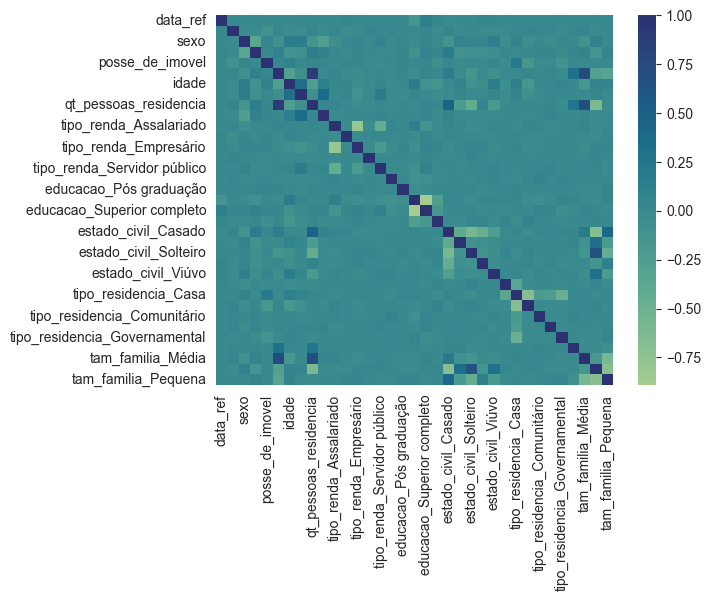

In [97]:
sns.heatmap(data=pd.get_dummies(data=df).corr(), cmap='crest')
plt.show()

Pela imagem é possível notar um padrão semelhante a imagem anterior, exceto que nesse caso também se encontram alguns casos isolados de forte correlação positiva, mas fica mais difícil avaliar e separar pares de correlações predominantes.

Vamos repetir o passo da etapa anterior e buscar pelas melhores correlações.

In [99]:
corr = pd.get_dummies(data=df).corr()
values0 = dict()
values = dict()

for col in corr:
    values0[col] = ([(corr[col].index[corr[col] == item].tolist()[0], item) for item in corr[col] if (item > 0.5) or (item < -0.5)])

for key in values0.keys():
    if len(values0[key]) != 1:
        values[key] = [item for item in values0[key] if item[1] != 1.0]

for key in values.keys():
    print('A classe/variável {} tem correlações com:'.format(key))
    for c, v in values[key]:
        print('\tClasse/variável {} igual a {}'.format(c, v))
    print()

A classe/variável qtd_filhos tem correlações com:
	Classe/variável qt_pessoas_residencia igual a 0.9030305910050394
	Classe/variável tam_familia_Média igual a 0.7398763378949418

A classe/variável qt_pessoas_residencia tem correlações com:
	Classe/variável qtd_filhos igual a 0.9030305910050394
	Classe/variável tam_familia_Média igual a 0.7018173881300782
	Classe/variável tam_familia_Mínima igual a -0.6030400292555101

A classe/variável tipo_renda_Assalariado tem correlações com:
	Classe/variável tipo_renda_Empresário igual a -0.7890517821093915

A classe/variável tipo_renda_Empresário tem correlações com:
	Classe/variável tipo_renda_Assalariado igual a -0.7890517821093915

A classe/variável educacao_Secundário tem correlações com:
	Classe/variável educacao_Superior completo igual a -0.8907211236221279

A classe/variável educacao_Superior completo tem correlações com:
	Classe/variável educacao_Secundário igual a -0.8907211236221279

A classe/variável estado_civil_Casado tem correlações 

Observando a lista acima, podemos identificar algumas pares de correlações fortes:
- qtd_filhos x qt_pessoas_residencia
- qtd_filhos x tam_familia_Média
- qt_pessoas_residencia x tam_familia_Média
- qt_pessoas_residencia x tam_familia_Mínima
- estado_civil_Casado x tam_familia_Mínima
- estado_civil_Solteiro x tam_familia_Mínima

Quatro correlações a mais quando comparado com a lista anterior, vamos lembrar dessas relações para a etapa de modelagem. Nós podemos atribuir as correlações das variáveis **qtd_filhos** e **qt_pessoas_residencia** com **tam_familia** pela forma como construímos essa nova variável, contudo, ela revelou para nós uma correlação interessante entre **tam_familia** e **estado_civil**, algo que não seria revelado caso não tivéssimos criado a variável.

Abaixo, vamos verificar a correlação com a nossa variável-alvo **renda**.

In [100]:
pd.get_dummies(data=df).assign(renda = df['renda']).corr()['renda']

data_ref                         0.002227
id_cliente                      -0.018035
sexo                            -0.261835
posse_de_veiculo                 0.086338
posse_de_imovel                  0.013563
qtd_filhos                      -0.000560
idade                            0.126804
tempo_emprego                    0.375000
qt_pessoas_residencia            0.017502
renda                            1.000000
tipo_renda_Assalariado          -0.016948
tipo_renda_Bolsista             -0.003203
tipo_renda_Empresário           -0.011560
tipo_renda_Pensionista          -0.008810
tipo_renda_Servidor público      0.045226
educacao_Primário               -0.008291
educacao_Pós graduação          -0.008452
educacao_Secundário              0.000845
educacao_Superior completo       0.014755
educacao_Superior incompleto    -0.030878
estado_civil_Casado              0.055418
estado_civil_Separado           -0.017076
estado_civil_Solteiro           -0.028587
estado_civil_União              -0

Assim como antes, não é possível visualizar uma correlação única que seja relevante (fator maior que 0.5) entre as variáveis númericas, discretas e classes das variáveis categóricas.

Vamos visualizar as informações obtidas em forma de gráficos de barras.

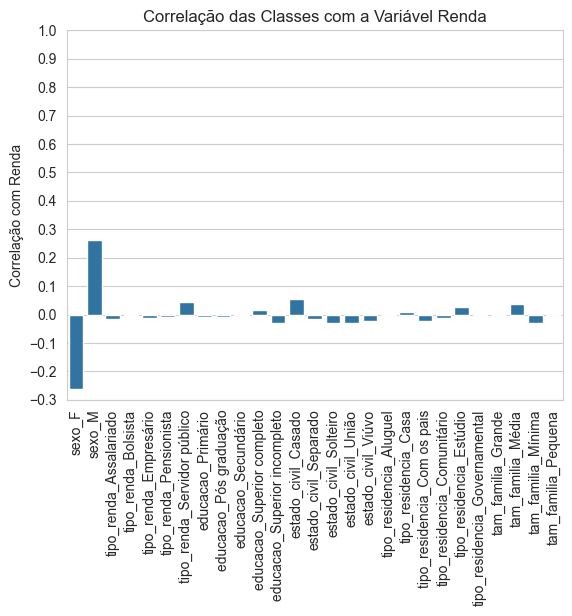

In [106]:
fig, ax = plt.subplots()
sns.barplot(pd.get_dummies(data=df)
            .drop(labels=[col for col in df.columns], errors='ignore', axis=1)
            .assign(renda = df['renda'])
            .corr()
            .drop('renda', axis=0)['renda'], ax=ax)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(ticks=np.arange(-.3, 1.1, .1))
ax.set_ylabel('Correlação com Renda')
plt.title('Correlação das Classes com a Variável Renda')
plt.show()

A partir da imagem, notamos que a correlação das *classes* com a nossa variável-alvo fluta entre 0.1 e 0, positivamente ou negativamente. Com o intuito de comparação, vamos incluir as demais variáveis no gráfico.

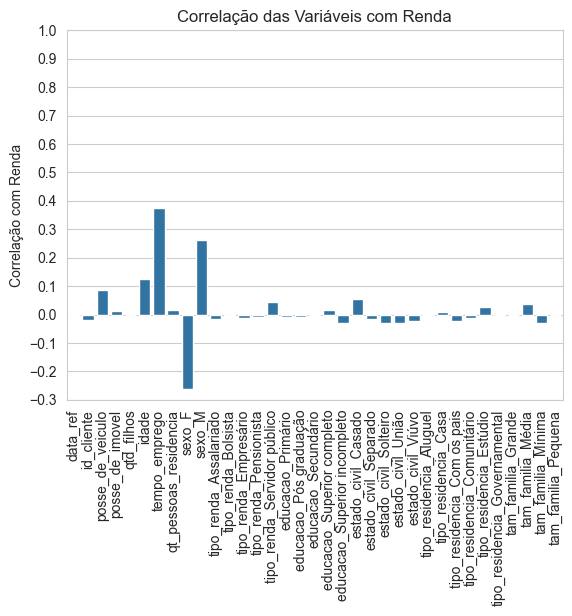

In [107]:
fig, ax = plt.subplots()
sns.barplot(pd.get_dummies(data=df).corr()['renda'].drop('renda', axis=0), ax=ax)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(ticks=np.arange(-.3, 1.1, .1))
ax.set_ylabel('Correlação com Renda')
plt.title('Correlação das Variáveis com Renda')
plt.show()

A partir do gráfico acima criado, podemos identificar alguns pares de variáveis correlacionadas de forma relevante com a variável **renda**:
- sexo com uma correlação negativa entre -0.2 e -0.3
- posse_de_veiculo com uma correlação positiva próxima a 0.1
- idade com uma correlação positiva entre 0.1 e 0.2
- tempo_emprego com uma correlação positiva próxima a 0.4

As demais variáveis, variam entre 0 e 0.1, seja positivamente ou negativamente. Mas todas elas, assim como vimos antes, estando abaixo de 0.5, o nosso fator de relevância.

Com isso, podemos concluir essa secção sabendo que a variável **renda** não possui fortes correlações com nenhuma outra variável ou classe do nosso conjunto de dados, mas que as variáveis **qtd_filhos, qt_pessoas_residencia, estado_civil e tam_familia** possuem fortes correlações de suas classes entre si.

Também sabemos, a partir da nossa análise de entropia, que as variáveis **sexo, posse_de_veiculo e posse_de_imovel** são um grupo de alta entropia, enquanto as variáveis **estado_civil, tam_familia, tipo_renda e educacao** são um grupo de baixa entropia. A única variável que iremos eliminar dessa secção, devido a sua baixíssima entropia e nenhuma contribuição com correlações entre classes, variáveis e nossa variável-alvo é a variável **tipo_residencia**.

In [104]:
df = df.drop('tipo_residencia', axis=1)
df.head(5)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,idade,tempo_emprego,qt_pessoas_residencia,renda,tam_familia
0,2015-01-01,15056,1,0,1,0,Empresário,Secundário,Solteiro,26,6.602740,1,8060.34,Mínima
1,2015-01-01,9968,0,1,1,0,Assalariado,Superior completo,Casado,28,7.183562,2,1852.15,Pequena
2,2015-01-01,4312,1,1,1,0,Empresário,Superior completo,Casado,35,0.838356,2,2253.89,Pequena
3,2015-01-01,10639,1,0,1,1,Servidor público,Superior completo,Casado,30,4.846575,3,6600.77,Pequena
4,2015-01-01,7064,0,1,0,0,Assalariado,Secundário,Solteiro,33,4.293151,1,6475.97,Mínima


Agora podemos começar a modelagem.

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.